In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [3]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [4]:
train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [5]:
test

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


In [6]:
train=train.dropna(axis=1)
test=test.dropna(axis=1)

In [7]:
train = train.drop(train[(train['GrLivArea']>4000) & (train['SalePrice']<300000)].index)
#GrLiveArea에서 이상값이 발견되기 때문에 삭제

In [8]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for i in train.columns:
    if train[i].dtypes != "object":
        continue
    train[i] = le.fit_transform(train[i])
    

for i in test.columns:
    if test[i].dtypes != "object":
        continue
    test[i] = le.fit_transform(test[i])

In [9]:
corr = train.corr(method="pearson")
corr2 = test.corr(method="pearson")
corr

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,1.000000,0.011121,-0.006074,-0.037689,0.008885,0.031665,-0.017544,0.013349,0.051784,0.005984,...,0.003103,-0.046600,0.001491,0.048476,-0.006195,0.023511,0.000378,0.020376,-0.006474,-0.021673
MSSubClass,0.011121,1.000000,0.035905,-0.142033,-0.024975,0.119435,-0.002572,-0.022841,0.076073,-0.025650,...,-0.012002,-0.043813,-0.026004,0.008090,-0.007675,-0.013581,-0.021386,0.012571,-0.025074,-0.084276
MSZoning,-0.006074,0.035905,1.000000,-0.034639,0.087658,0.061886,-0.018294,-0.001194,-0.009947,-0.022070,...,0.115497,0.000355,0.019073,-0.002903,0.009288,-0.031577,-0.020645,0.097440,0.009572,-0.166883
LotArea,-0.037689,-0.142033,-0.034639,1.000000,-0.200080,-0.164894,-0.129733,0.010407,-0.117230,0.443900,...,-0.016505,0.021362,0.045288,0.036491,0.039072,0.005744,-0.013699,0.018098,0.028187,0.268179
Street,0.008885,-0.024975,0.087658,-0.200080,1.000000,-0.010172,0.117591,0.001684,0.014034,-0.179346,...,0.023116,0.007484,-0.033138,0.004095,-0.022725,0.003724,-0.025026,0.014435,0.005971,0.041046
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MoSold,0.023511,-0.013581,-0.031577,0.005744,0.003724,-0.032199,-0.013405,-0.051664,0.015880,0.006992,...,-0.029097,0.029483,0.023151,-0.018601,-0.006544,1.000000,-0.145267,-0.047918,0.013825,0.046124
YrSold,0.000378,-0.021386,-0.020645,-0.013699,-0.025026,0.035892,0.019435,0.023347,-0.005569,-0.002379,...,-0.010035,0.018610,0.010608,-0.064030,0.004878,-0.145267,1.000000,-0.002648,0.004249,-0.028882
SaleType,0.020376,0.012571,0.097440,0.018098,0.014435,-0.001808,-0.031359,-0.126888,0.013511,0.054594,...,-0.017224,-0.009196,0.004174,0.019910,0.015666,-0.047918,-0.002648,1.000000,0.185841,-0.055093
SaleCondition,-0.006474,-0.025074,0.009572,0.028187,0.005971,-0.037149,0.040288,-0.089737,0.052656,-0.042787,...,-0.097930,0.004562,-0.019699,-0.080356,0.013173,0.013825,0.004249,0.185841,1.000000,0.213445


In [10]:
related = corr.loc[abs(corr["SalePrice"]) >= 0.3]
related.drop("SalePrice")
related=related.drop(['GarageArea', 'TotalBsmtSF', 'BsmtFinSF1', 'GarageCars', 'KitchenQual'])

# 'GarageArea', 'TotalBsmtSF', 'BsmtFinSF1', 'GarageCars', 'KitchenQual'
related

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
OverallQual,-0.030213,0.032522,-0.160804,0.091392,0.058897,-0.189066,0.044821,-0.001789,-0.028850,-0.065939,...,-0.113176,0.030991,0.066298,0.044758,-0.031238,0.072531,-0.026575,-0.057047,0.190584,0.795774
YearBuilt,-0.013463,0.027757,-0.309139,0.007462,0.021052,-0.225346,0.170059,-0.011473,0.014725,-0.073343,...,-0.387093,0.031578,-0.049972,-0.005171,-0.034273,0.012975,-0.013250,-0.050903,0.199573,0.523608
YearRemodAdd,-0.022694,0.040503,-0.174809,0.007500,0.065423,-0.153028,0.100566,-0.034069,-0.004204,-0.058810,...,-0.193551,0.045504,-0.038360,-0.003426,-0.010160,0.022020,0.036145,0.021179,0.220347,0.507717
ExterQual,0.003884,-0.016950,0.202175,-0.037221,0.050767,0.146910,-0.023799,0.017398,-0.005718,0.020093,...,0.119290,-0.036079,-0.016227,-0.004812,0.009816,-0.026544,-0.037848,0.082935,-0.184824,-0.643381
Foundation,0.008032,0.058070,-0.235235,-0.016061,0.035221,-0.134509,0.058629,-0.014354,-0.011055,-0.027537,...,-0.206968,0.050542,-0.067014,-0.008381,-0.004530,-0.001547,0.009336,0.017621,0.139263,0.382795
HeatingQC,0.002681,0.020860,0.134296,0.009383,-0.053946,0.095550,-0.071842,0.006922,-0.010999,0.035420,...,0.093448,-0.054520,0.055510,0.036532,0.019203,-0.002127,0.008563,-0.017763,-0.168766,-0.400533
1stFlrSF,0.003921,-0.262529,-0.057366,0.269234,0.005534,-0.174837,-0.003938,0.013042,-0.055058,0.073339,...,-0.064247,0.059521,0.095042,0.062756,-0.021045,0.040558,-0.012810,-0.113319,0.067623,0.631530
2ndFlrSF,0.005248,0.308672,-0.051519,0.041026,0.046952,-0.057887,-0.023499,-0.020811,-0.051154,-0.008647,...,0.063211,-0.024107,0.041504,0.074258,0.016497,0.034665,-0.027775,0.056312,0.034843,0.320532
GrLivArea,0.003138,0.076778,-0.085089,0.232927,0.045049,-0.175736,-0.032617,-0.008590,-0.084677,0.047637,...,0.012976,0.022520,0.107768,0.115999,-0.001637,0.057296,-0.035971,-0.033362,0.072641,0.734968
FullBath,0.005750,0.131773,-0.198690,0.119679,0.046439,-0.157452,0.060299,-0.026869,-0.007630,-0.046530,...,-0.114558,0.035715,-0.007496,0.045656,-0.014122,0.054756,-0.018697,-0.033294,0.141744,0.562165


In [11]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

set = [i for i in  related.index if i !="SalePrice"]

rf_model = RandomForestRegressor()
rf_model.fit(train[set], train["SalePrice"])

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [12]:
predict = rf_model.predict(test[set])

In [13]:
test["SalePrice"] = predict
test

,Id,MSSubClass,LotArea,Street,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleCondition,SalePrice
0,1461,20,11622,1,3,3,4,0,12,1,...,0,0,0,120,0,0,6,2010,4,123243.49
1,1462,20,14267,1,0,3,0,0,12,2,...,36,0,0,0,0,12500,6,2010,4,157500.50
2,1463,60,13830,1,0,3,4,0,8,2,...,34,0,0,0,0,0,3,2010,4,167277.54
3,1464,60,9978,1,0,3,4,0,8,2,...,36,0,0,0,0,0,6,2010,4,186076.40
4,1465,120,5005,1,0,1,4,0,22,2,...,82,0,0,144,0,0,1,2010,4,200063.54
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,1936,1,3,3,4,0,10,2,...,0,0,0,0,0,0,6,2006,4,84427.00
1455,2916,160,1894,1,3,3,4,0,10,2,...,24,0,0,0,0,0,4,2006,0,84467.00
1456,2917,20,20000,1,3,3,4,0,11,2,...,0,0,0,0,0,0,9,2006,0,154127.74
1457,2918,85,10441,1,3,3,4,0,11,2,...,32,0,0,0,0,700,7,2006,4,116837.00


[Text(0.5, 1.0, 'test')]

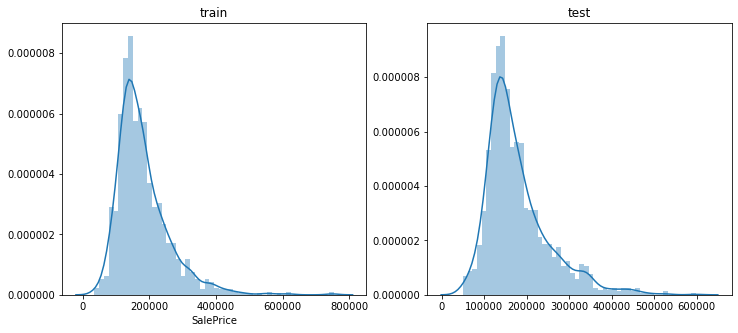

In [14]:
fig,(ax1,ax2)= plt.subplots(ncols=2)
fig.set_size_inches(12,5)
sns.distplot(train["SalePrice"],ax=ax1,bins=50)
ax1.set(title="train")
sns.distplot(predict,ax=ax2,bins=50)
ax2.set(title="test")

In [15]:
submission = pd.read_csv("sample_submission.csv")
submission["SalePrice"] = predict